# Clustering Task 3

# Importing Libraries

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt

# Pre-Processing

In [39]:
# Log Transformation of Monetary and Frequency
customer_data['LogMonetary'] = np.log1p(customer_data['Monetary'])
customer_data['LogFrequency'] = np.log1p(customer_data['Frequency'])

# Normalizing Recency to the same scale as other features
customer_data['NormRecency'] = (customer_data['Recency'] - customer_data['Recency'].min()) / (customer_data['Recency'].max() - customer_data['Recency'].min())

# Create new DataFrame with transformed features
transformed_data = customer_data[['LogMonetary', 'LogFrequency', 'NormRecency'] + [col for col in customer_data.columns if 'Region' in col]]

# Clustering (K-Means) and Determining Optimal Clusters

C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

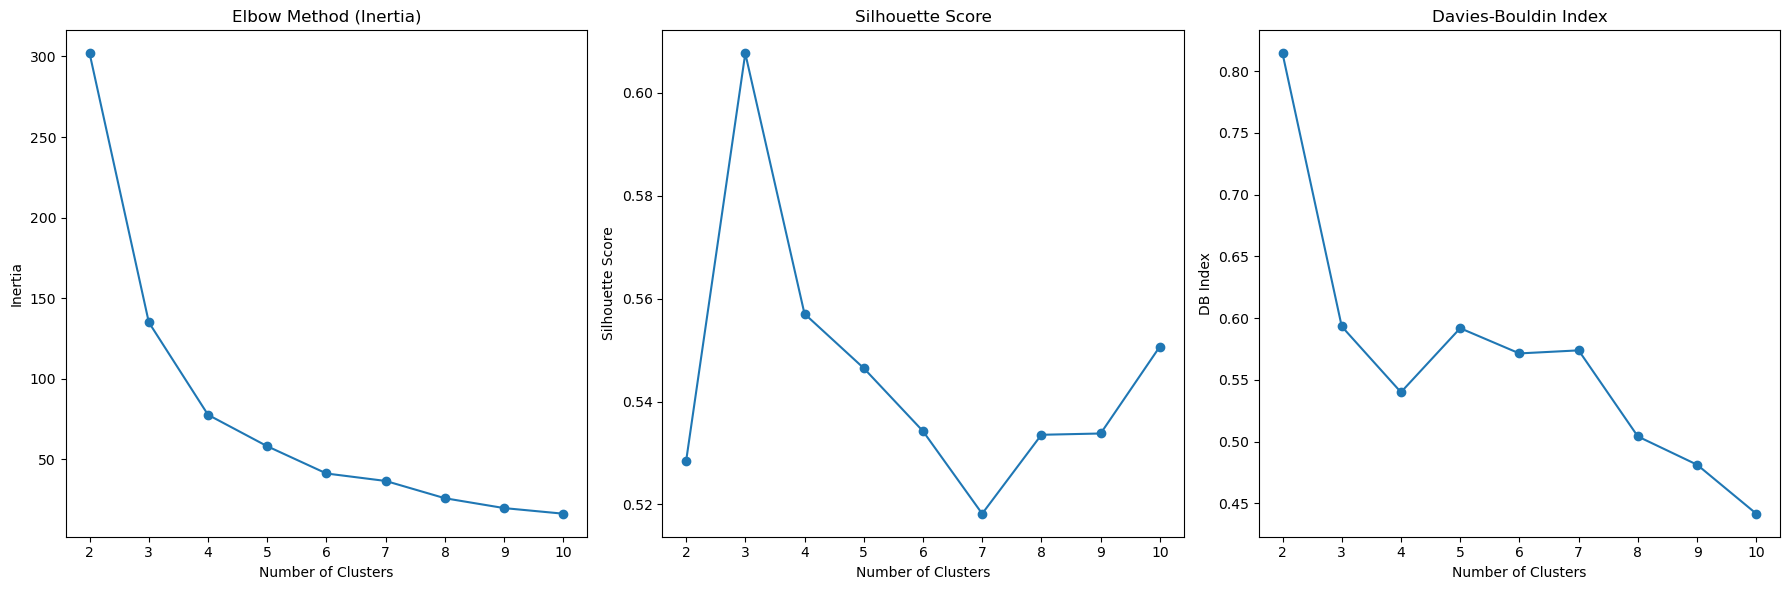


 Optimal number of clusters: 4

 DB Index: 0.5399770426508923

 Silhouette Score: 0.5570604035590846


C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(transformed_data)

# Dimensionality reduction with PCA to see if it helps in better clustering
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Determine the optimal number of clusters using Davies-Bouldin Index & Silhouette Score
inertia = []
sil_scores = []
db_indexes = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(reduced_data, kmeans.labels_))
    db_indexes.append(davies_bouldin_score(reduced_data, kmeans.labels_))

# Plotting the results for Elbow Method, Silhouette Score, and DB Index
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 3, 2)
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(range(2, 11), db_indexes, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()

# Choose optimal number of clusters (based on analysis above, we can adjust K accordingly)
optimal_k = 4

# Final KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(reduced_data)

# Assign cluster labels
customer_data['Cluster'] = kmeans.labels_

# Calculate clustering metrics
db_index = davies_bouldin_score(reduced_data, kmeans.labels_)
silhouette = silhouette_score(reduced_data, kmeans.labels_)

print(f"\n Optimal number of clusters: {optimal_k}")
print(f"\n DB Index: {db_index}")
print(f"\n Silhouette Score: {silhouette}")

# Visualizing the Clusters

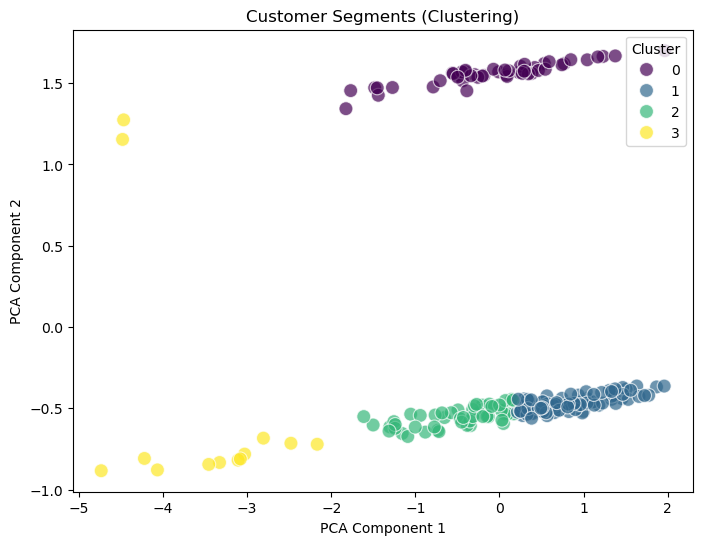

In [43]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments (Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()
